# Задания

1. Создайте и обучите модель для MNIST
2. Оцените точность результата
3. Используйте часть обучающихся данных как валидацию (аргумент у метода fit validation_split) и выведите график изменения точности (значения в переменной history)
4. Постройте полносвязную нейронную сеть и обучите её на данных с Титаника

In [5]:
# 1. Создайте и обучите модель для MNIST
# 2. Оцените точность результата
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, Input, Flatten, MaxPool2D
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train_cl = to_categorical(y_train, num_classes=10)
y_test_cl = to_categorical(y_test, num_classes=10)
x_train_scaled = x_train.astype("float32") / 255
x_test_scaled = x_test.astype("float32") / 255

x_train_scaled = np.expand_dims(x_train_scaled, -1)
x_test_scaled = np.expand_dims(x_test_scaled, -1)
print("x_train shape:", x_train_scaled.shape)
print("x_test shape:", x_test_scaled.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [10]:
inp = Input(shape=(28, 28, 1))
layer = Conv2D(filters=8, kernel_size=(3, 3), padding='same')(inp)
layer = MaxPool2D(pool_size=(2, 2))(layer)
layer = Conv2D(filters=16, kernel_size=(3, 3), padding='same')(layer)
layer = MaxPool2D(pool_size=(2, 2))(layer)
layer = Flatten()(layer)
layer = Dense(units=128)(layer)
out = Dense(units=10, activation='softmax')(layer)
model = Model(inp, out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_pred = model.predict(x_test_scaled) # Предсказание на необученной модели
history = model.fit(x_train_scaled, y_train_cl, batch_size=16, epochs=10) #Обучение

Epoch 1/10
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1598 - accuracy: 0.9513
Epoch 2/10
3750/3750 [==============================] - 26s 7ms/step - loss: 0.0755 - accuracy: 0.9767
Epoch 3/10
3750/3750 [==============================] - 26s 7ms/step - loss: 0.0611 - accuracy: 0.9815
Epoch 4/10
3750/3750 [==============================] - 30s 8ms/step - loss: 0.0532 - accuracy: 0.9830
Epoch 5/10
3750/3750 [==============================] - 30s 8ms/step - loss: 0.0477 - accuracy: 0.9852
Epoch 6/10
3750/3750 [==============================] - 29s 8ms/step - loss: 0.0456 - accuracy: 0.9853 0s - loss:
Epoch 7/10
3750/3750 [==============================] - 30s 8ms/step - loss: 0.0411 - accuracy: 0.9866
Epoch 8/10
3750/3750 [==============================] - 25s 7ms/step - loss: 0.0390 - accuracy: 0.9872
Epoch 9/10
3750/3750 [==============================] - 26s 7ms/step - loss: 0.0355 - accuracy: 0.9883
Epoch 10/10
3750/3750 [==============================] - 27s 7

In [12]:
# 2
loss,accuracy = model.evaluate(x_test_scaled,y_test_cl,verbose = 1) # Предсказание на обученной модели

313/313 [==============================] - 2s 5ms/step - loss: 0.0709 - accuracy: 0.9808


Epoch 1/10
2625/2625 [==============================] - 24s 9ms/step - loss: 0.0309 - accuracy: 0.9896 - val_loss: 0.0365 - val_accuracy: 0.9889
Epoch 2/10
2625/2625 [==============================] - 25s 9ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.0359 - val_accuracy: 0.9891
Epoch 3/10
2625/2625 [==============================] - 23s 9ms/step - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.0402 - val_accuracy: 0.9874
Epoch 4/10
2625/2625 [==============================] - 21s 8ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0546 - val_accuracy: 0.9857
Epoch 5/10
2625/2625 [==============================] - 21s 8ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0502 - val_accuracy: 0.9856
Epoch 6/10
2625/2625 [==============================] - 21s 8ms/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.0647 - val_accuracy: 0.9843
Epoch 7/10
2625/2625 [==============================] - 20s 8ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0569 - val_ac

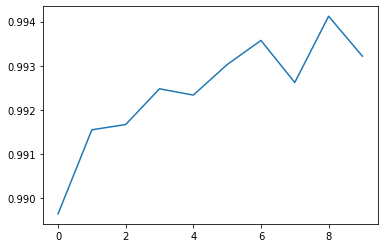

In [3]:
# 3. Используйте часть обучающихся данных как валидацию (аргумент у метода fit validation_split) 
# и выведите график изменения точности (значения в переменной history)

history = model.fit(x_train_scaled, y_train_cl, batch_size=16, epochs=10, validation_split=0.3)
history.history.keys()
fig = plt.figure()
plt.plot(history.history['accuracy'])

In [18]:
# 4. Постройте полносвязную нейронную сеть и обучите её на данных с Титаника

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/titanic/train.csv')

Y = df['Survived']
X = df.drop(['Survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

y_train_cl = to_categorical(y_train, num_classes=2)
y_test_cl = to_categorical(y_test, num_classes=2)

X_train = X_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X_test = X_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X_val = X_val.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

def prepare_num(df):
    df_num = df.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
    df_sex = pd.get_dummies(df['Sex'])
    df_emb = pd.get_dummies(df['Embarked'], prefix='Emb')
    df_pcl = pd.get_dummies(df['Pclass'], prefix='Pclass')

    df_num = pd.concat((df_num, df_sex, df_emb, df_pcl), axis=1)
    return df_num

X_train = prepare_num(X_train)
X_test = prepare_num(X_test)
X_val = prepare_num(X_val)

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())
X_val = X_val.fillna(X_val.median())

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() # (x - x.min()) / (x.max() - x.min())  Почему кстати он применяется, а не StandartScaler?
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
x_val_scaled = scaler.transform(X_val)

In [19]:
from keras.models import Sequential
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_dim=12))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(x_train_scaled, y_train_cl, batch_size=16, epochs=10, validation_split=0.3) #Обучение
loss,accuracy = model.evaluate(x_test_scaled,y_test_cl,verbose = 1) # Предсказание на обученной модели

Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 0.6438 - accuracy: 0.6307 - val_loss: 0.5507 - val_accuracy: 0.8070
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5400 - accuracy: 0.7638 - val_loss: 0.4778 - val_accuracy: 0.8363
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.7739 - val_loss: 0.4509 - val_accuracy: 0.8304
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4882 - accuracy: 0.7915 - val_loss: 0.4561 - val_accuracy: 0.8304
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.8015 - val_loss: 0.4389 - val_accuracy: 0.8304
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4561 - accuracy: 0.8141 - val_loss: 0.4321 - val_accuracy: 0.8246
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.8090 - val_loss: 0.4305 - val_accuracy: 0.8304
Epoch 8/10
25/25 [=

In [21]:
loss,accuracy = model.evaluate(x_test_scaled,y_test_cl,verbose = 1)

6/6 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7709
